In [1]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "/Users/luizeduardovedoato/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/luizeduardovedoato/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/luizeduardovedoato/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
      

In [2]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Salesdf = pd.read_csv ('/Users/luizeduardovedoato/DEV/PredictIceCreamSalesUsingTemperature/SalesData.csv')

In [4]:
Salesdf.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [5]:
Salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


**Visualize Dataset**

<Axes: xlabel='Temperature', ylabel='Revenue'>

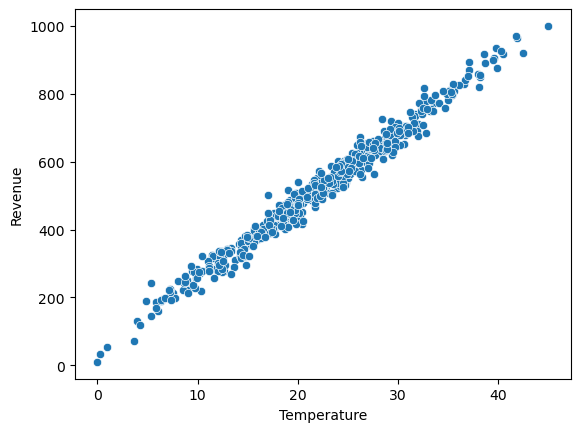

In [6]:
sns.scatterplot(x = Salesdf['Temperature'],y = Salesdf['Revenue'])

**Create testing and training dataset**

In [7]:
X_train = Salesdf['Temperature']
Y_train = Salesdf['Revenue']

**Build and trai the model**

In [8]:
X_train.shape

(500,)

In [9]:
Y_train.shape

(500,)

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [13]:
epochs_hist = model.fit (X_train, Y_train, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 0s 865us/step - loss: 268960.6250
Epoch 2/1000
16/16 [==============================] - 0s 510us/step - loss: 230127.1250
Epoch 3/1000
16/16 [==============================] - 0s 494us/step - loss: 195701.8281
Epoch 4/1000
16/16 [==============================] - 0s 499us/step - loss: 164999.6406
Epoch 5/1000
16/16 [==============================] - 0s 497us/step - loss: 138110.4688
Epoch 6/1000
16/16 [==============================] - 0s 501us/step - loss: 114750.7578
Epoch 7/1000
16/16 [==============================] - 0s 502us/step - loss: 94732.4219
Epoch 8/1000
16/16 [==============================] - 0s 464us/step - loss: 77582.3359
Epoch 9/1000
16/16 [==============================] - 0s 490us/step - loss: 62852.0547
Epoch 10/1000
16/16 [==============================] - 0s 455us/step - loss: 50835.5898
Epoch 11/1000
16/16 [==============================] - 0s 468us/step - loss: 40586.9648
Epoch 12/1000
16/16 [==============

**Evaluat the model**

In [14]:
epochs_hist.history.keys()

dict_keys(['loss'])

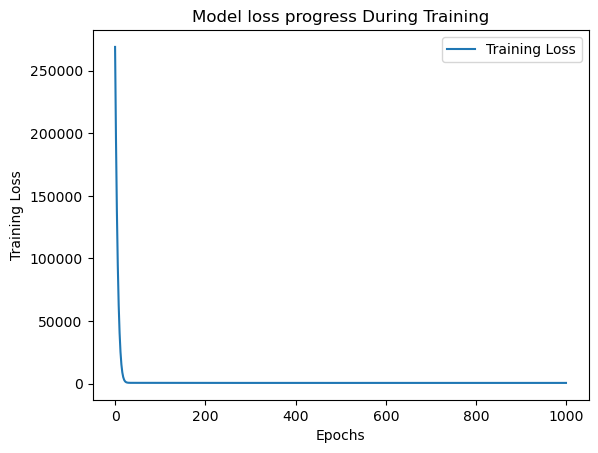

In [15]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model loss progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [16]:
model.get_weights()

[array([[21.40533]], dtype=float32), array([44.772453], dtype=float32)]

In [17]:
Temp = 20
Revenue = model.predict([Temp])
print("$",Revenue)

1/1 [==============================] - 0s 55ms/step
$ [[472.8791]]


16/16 [==============================] - 0s 559us/step


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

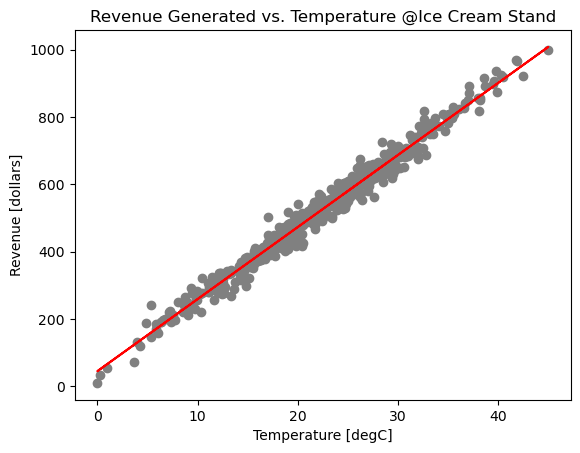

In [18]:
plt.scatter(X_train, Y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')